In [0]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [0]:
# Load data set
raw = pd.read_csv("/content/drive/My Drive/Veri Bilimi Final/mushrooms.csv")

# Extract label's from dataset
label = raw['class']
data = raw.drop('class', axis = 1)

In [13]:
data.head()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,x,s,n,t,p,f,c,n,k,e,e,s,s,w,w,p,w,o,p,k,s,u
1,x,s,y,t,a,f,c,b,k,e,c,s,s,w,w,p,w,o,p,n,n,g
2,b,s,w,t,l,f,c,b,n,e,c,s,s,w,w,p,w,o,p,n,n,m
3,x,y,w,t,p,f,c,n,n,e,e,s,s,w,w,p,w,o,p,k,s,u
4,x,s,g,f,n,f,w,b,k,t,e,s,s,w,w,p,w,o,e,n,a,g


# DATANIN TANIMI

In [14]:
# COLUMNS
print("# of columns: %d" % len(data.columns))
print(data.columns)

# of columns: 22
Index(['cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'],
      dtype='object')


In [15]:
# SAMPLE SIZE
data.shape

(8124, 22)

In [16]:
# Data Types
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   cap-shape                 8124 non-null   object
 1   cap-surface               8124 non-null   object
 2   cap-color                 8124 non-null   object
 3   bruises                   8124 non-null   object
 4   odor                      8124 non-null   object
 5   gill-attachment           8124 non-null   object
 6   gill-spacing              8124 non-null   object
 7   gill-size                 8124 non-null   object
 8   gill-color                8124 non-null   object
 9   stalk-shape               8124 non-null   object
 10  stalk-root                8124 non-null   object
 11  stalk-surface-above-ring  8124 non-null   object
 12  stalk-surface-below-ring  8124 non-null   object
 13  stalk-color-above-ring    8124 non-null   object
 14  stalk-color-below-ring  

In [17]:
data.describe()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,6,4,10,2,9,2,2,2,12,2,5,4,4,9,9,1,4,3,5,9,6,7
top,x,y,n,f,n,f,c,b,b,t,b,s,s,w,w,p,w,o,p,w,v,d
freq,3656,3244,2284,4748,3528,7914,6812,5612,1728,4608,3776,5176,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


In [0]:
for col in data.columns:
    data[col] = data[col].astype('category', copy=False)

**Histogram Of Features**

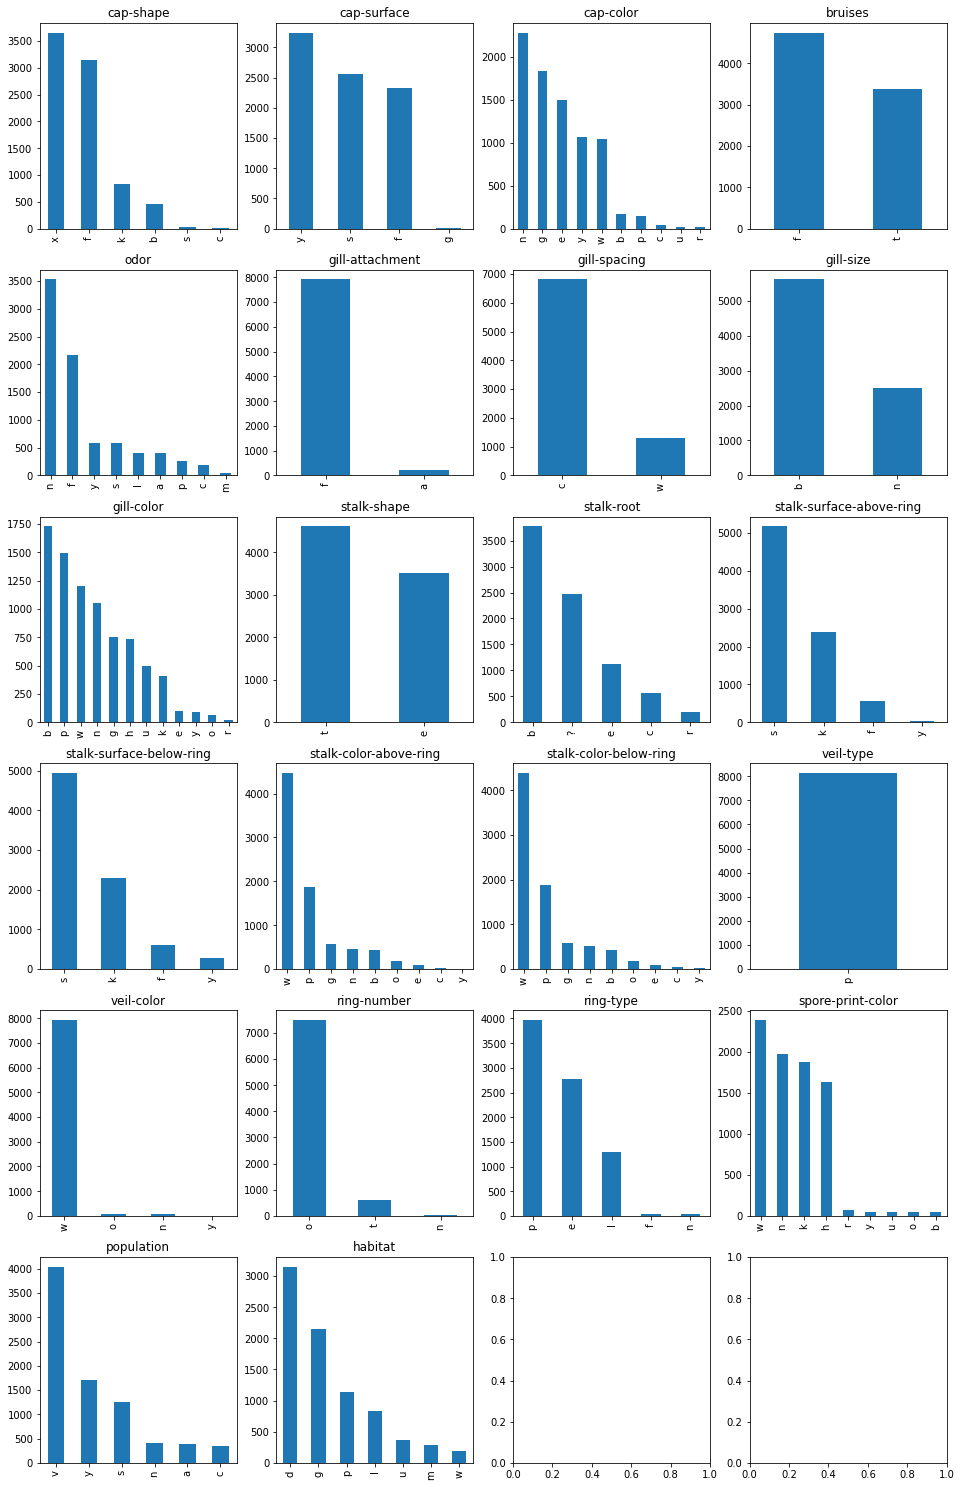

In [19]:
fig, axs = plt.subplots(nrows=6, ncols=4)

r = 0
c = 0
for col in data.columns:
    data[col].value_counts().plot(kind='bar',ax=axs[r][c], title=col)
    c = c + 1
    if c == 4:
        r = r + 1
        c = 0

plt.subplots_adjust(left=0.1, right=2.2, top=5, bottom=0)

**Missing values**


Dataset içerisinde Null değer bulunmamaktadır ama boş değerler yerine "?" işareti bulunmaktadır. Datasetin üreticileri tarafından belirtilmiştir. bu nedenle null değer yerine "?" değer aranacaktır

Exist: 5644
Non Exist : 2480


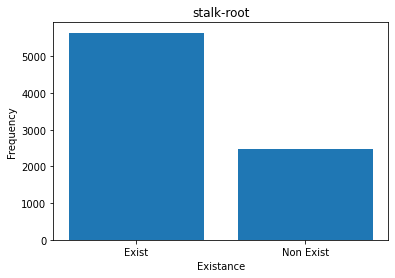

In [20]:
missing_features = []
def checkExistance():
    for col in data.columns:
        data_non_exist = data[data[col] == '?']

        if len(data_non_exist):
            missing_features.append(col)
            
    del data_non_exist
            
def plotMissingFeatures():
    for col in missing_features:      
        data_exist = data[data[col] != '?']
        data_non_exist = data[data[col] == '?']

        print("Exist:",len(data_exist))
        print("Non Exist :",len(data_non_exist))
        y = np.array([len(data_exist),len(data_non_exist)])
        x = ["Exist","Non Exist"]
        plt.bar(x,y)
        plt.title(col)
        plt.xlabel("Existance")
        plt.ylabel("Frequency")
        plt.show()

    del data_exist
    del data_non_exist
    
checkExistance()
plotMissingFeatures()

"stalk-root" Kolonunda bulunmaktadır "?" değer sadece. daha az sayıda olsaydı eğer elenebilirdi satırlar. Ancak toplam datanın yaklaşık %28'ini oluşturduğu için kolonu kaldırmayı planladım. Ayrıca "veil-type" kolonu sadece bir uniq değer (p) aldığı için hiçbir katkısı olmamasından ötürü onu da çıkarmam gerektiğine karar verdim.

In [0]:
data = data.drop('stalk-root', axis = 1)
data = data.drop('veil-type', axis = 1)

In [26]:
data

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,x,s,n,t,p,f,c,n,k,e,s,s,w,w,w,o,p,k,s,u
1,x,s,y,t,a,f,c,b,k,e,s,s,w,w,w,o,p,n,n,g
2,b,s,w,t,l,f,c,b,n,e,s,s,w,w,w,o,p,n,n,m
3,x,y,w,t,p,f,c,n,n,e,s,s,w,w,w,o,p,k,s,u
4,x,s,g,f,n,f,w,b,k,t,s,s,w,w,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,k,s,n,f,n,a,c,b,y,e,s,s,o,o,o,o,p,b,c,l
8120,x,s,n,f,n,a,c,b,y,e,s,s,o,o,n,o,p,b,v,l
8121,f,s,n,f,n,a,c,b,n,e,s,s,o,o,o,o,p,b,c,l
8122,k,y,n,f,y,f,c,n,b,t,s,k,w,w,w,o,e,w,v,l


# PCA
PCA için datanın önce encode daha sonra scale edilmesi gerekmektedir.

In [0]:
from sklearn.preprocessing import RobustScaler, StandardScaler
from sklearn.preprocessing import LabelEncoder
def encode(df):
  df_copy = df.copy()
  for col in df_copy.columns:
        
    labelencoder=LabelEncoder()
    df_copy[col] = labelencoder.fit_transform(df_copy[col])
    
  return df_copy



In [0]:
encode_data=encode(data)
pca_data=StandardScaler().fit_transform(encode_data)

In [37]:
pca_data

array([[ 1.02971224,  0.14012794, -0.19824983, ..., -0.67019486,
        -0.5143892 ,  2.03002809],
       [ 1.02971224,  0.14012794,  1.76587407, ..., -0.2504706 ,
        -1.31310821, -0.29572966],
       [-2.08704716,  0.14012794,  1.37304929, ..., -0.2504706 ,
        -1.31310821,  0.86714922],
       ...,
       [-0.8403434 ,  0.14012794, -0.19824983, ..., -1.50964337,
        -2.11182722,  0.28570978],
       [-0.21699152,  0.95327039, -0.19824983, ...,  1.42842641,
         0.28432981,  0.28570978],
       [ 1.02971224,  0.14012794, -0.19824983, ...,  0.16925365,
        -2.11182722,  0.28570978]])

datayı görselleştirmek için datayı 2 komponent haline getirmeliyiz.

In [38]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
pca_trans = pca.fit_transform(pca_data)
covariance=pca.get_covariance()
explained_variance=pca.explained_variance_
explained_variance

array([3.70916666, 2.56821713])

No handles with labels found to put in legend.


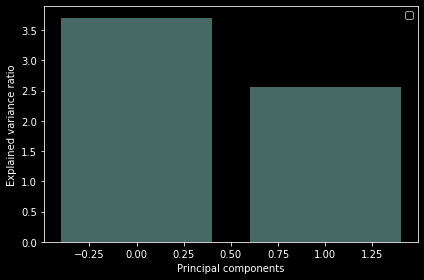

In [42]:
with plt.style.context('dark_background'):    
    plt.bar(np.arange(len(explained_variance)), explained_variance, alpha=0.5, align='center')
    plt.ylabel('Explained variance ratio')
    plt.xlabel('Principal components')
    plt.legend(loc='best')
    plt.tight_layout()

# Outliers

datada outliers bulunmamaktadır.

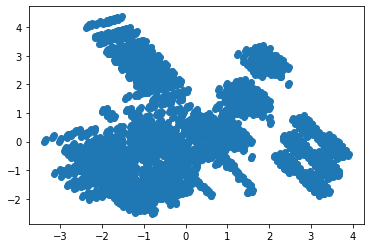

In [43]:
plt.scatter(pca_trans[:,0],pca_trans[:,1])
plt.show()

# K-Means

K-means clustering için en iyi modeli bulmamız gerekmektedir. her örneğin centrioidi arasındaki mesafeyi ölçebiliriz (inertia)

In [0]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
kmeans_k = []
inertias=[]
silhouette_scores=[]
rangemin=1
rangemax=15
for i in range(rangemin,rangemax):
    kmeans = KMeans(n_clusters=i, init="k-means++", n_init=50,
                     algorithm="full", max_iter=300, random_state=1)
    kmeans.fit(encode_data)
    Ypreds=kmeans.predict(encode_data)
    inertias.append(kmeans.inertia_)
    kmeans_k.append(kmeans)
    if i>1:
        silhouette_scores.append(silhouette_score(encode_data, Ypreds))

Text(0, 0.5, 'Total within-cluster sum of squares')

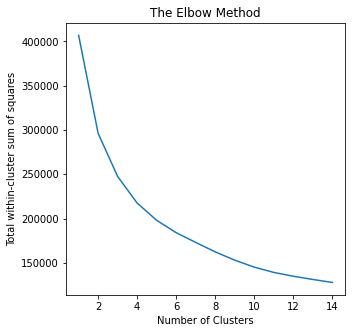

In [46]:
plt.figure(figsize=(5, 5))
plt.plot(range(rangemin, rangemax),inertias)
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Total within-cluster sum of squares')

Text(0, 0.5, 'Average silhouette score')

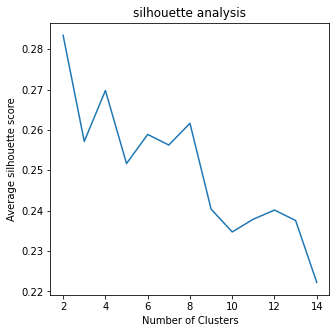

In [47]:
plt.figure(figsize=(5, 5))
plt.plot(range(rangemin+1, rangemax), silhouette_scores)
plt.title('silhouette analysis')
plt.xlabel('Number of Clusters')
plt.ylabel('Average silhouette score')

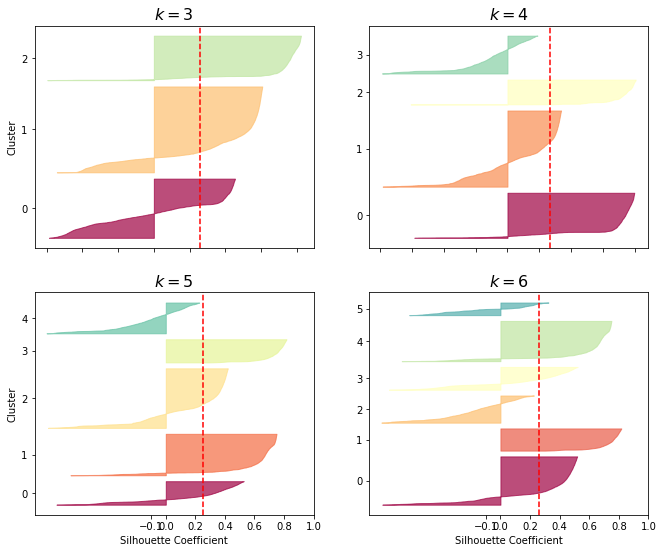

In [53]:
from sklearn.metrics import silhouette_samples
from matplotlib.ticker import FixedLocator, FixedFormatter
import matplotlib

plt.figure(figsize=(11, 9))

for k in (3, 4, 5, 6):
    plt.subplot(2, 2, k - 2)
    
    y_pred = kmeans_k[k - 1].labels_
    silhouette_coefficients = silhouette_samples(pca_trans, y_pred)

    padding = len(pca_trans) // 30
    pos = padding
    ticks = []
    for i in range(k):
        coeffs = silhouette_coefficients[y_pred == i]
        coeffs.sort()

        color = matplotlib.cm.Spectral(i / k)
        plt.fill_betweenx(np.arange(pos, pos + len(coeffs)), 0, coeffs,
                          facecolor=color, edgecolor=color, alpha=0.7)
        ticks.append(pos + len(coeffs) // 2)
        pos += len(coeffs) + padding

    plt.gca().yaxis.set_major_locator(FixedLocator(ticks))
    plt.gca().yaxis.set_major_formatter(FixedFormatter(range(k)))
    if k in (3, 5):
        plt.ylabel("Cluster")
    
    if k in (5, 6):
        plt.gca().set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
        plt.xlabel("Silhouette Coefficient")
    else:
        plt.tick_params(labelbottom=False)

    plt.axvline(x=silhouette_scores[k - 2], color="red", linestyle="--")
    plt.title("$k={}$".format(k), fontsize=16)

plt.show()

k değeri için 6 nın olması daha iyi olabileceğine karar verdim

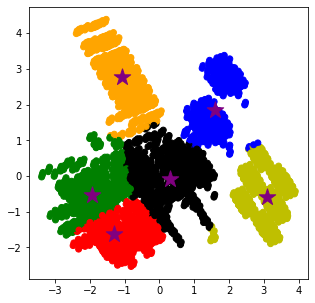

In [54]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=6, init="k-means++", n_init=50,
                     algorithm="full", max_iter=300, random_state=1)
X_clustered = kmeans.fit_predict(pca_trans)


LABEL_COLOR_MAP = {0 : 'g',
                   1 : 'y',
                   2: 'orange',
                   3: 'b',
                   4: "red",
                   5: "black",
                   6: "purple"
                  }
centroids = kmeans.cluster_centers_
label_color = [LABEL_COLOR_MAP[l] for l in X_clustered]
plt.figure(figsize = (5, 5))
plt.scatter(pca_trans[:,0],pca_trans[:,1], c=label_color)
plt.scatter(centroids[:, 0], centroids[:, 1], marker='*', s=300,
            c='purple', label='centroid')
plt.show()

In [55]:
kmeans.cluster_centers_

array([[-1.92724524, -0.54482801],
       [ 3.07804422, -0.5868656 ],
       [-1.07413788,  2.77618719],
       [ 1.60939028,  1.85066896],
       [-1.31288147, -1.62359446],
       [ 0.28861573, -0.08207649]])

In [56]:
kmeans.inertia_

4105.556194372333

# Agglomerative Clustering

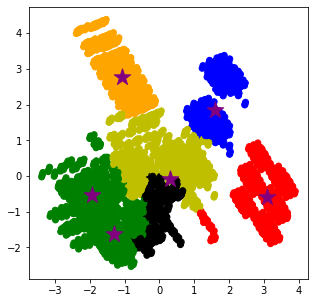

In [57]:
from sklearn.cluster import AgglomerativeClustering
agg = AgglomerativeClustering(n_clusters=6, linkage="complete")
X_clustered = agg.fit_predict(pca_trans)

LABEL_COLOR_MAP = {0 : 'g',
                   1 : 'y',
                   2: 'orange',
                   3: 'b',
                   4: "red",
                   5: "black",
                   6: "purple"
                  }
label_color = [LABEL_COLOR_MAP[l] for l in X_clustered]
plt.figure(figsize = (5, 5))
plt.scatter(pca_trans[:,0],pca_trans[:,1], c=label_color)
plt.scatter(centroids[:, 0], centroids[:, 1], marker='*', s=300,
            c='purple', label='centroid')
plt.show()

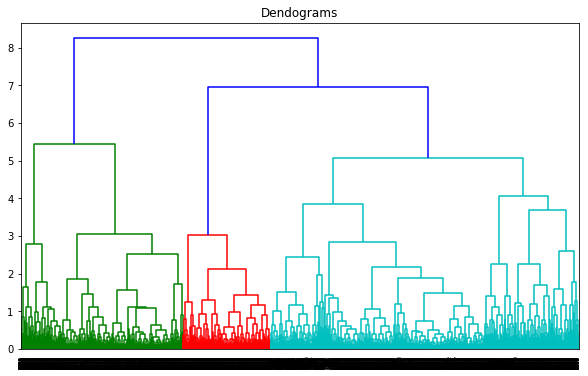

In [58]:
import matplotlib.pyplot as plt  
import pandas as pd  
%matplotlib inline
import numpy as np  

import scipy.cluster.hierarchy as shc

plt.figure(figsize=(10, 6))  
plt.title("Dendograms")  
dend = shc.dendrogram(shc.linkage(pca_trans, method='complete')) 